In [129]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

plt.style.use('fivethirtyeight')

In [130]:
df = pd.read_csv('preprocessed_fire_data.csv')

In [131]:
print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"High severity: {df['high_severity'].sum():,} ({df['high_severity'].mean()*100:.1f}%)")

Dataset: 100,000 rows × 21 columns
High severity: 29,979 (30.0%)


In [132]:
df.head()

,latitude,longitude,scan,track,satellite,instrument,confidence,version,bright_ti5,frp,...,type,year,month,day_of_year,season,high_severity,is_daytime,frp_mw,confidence_pct,region
0,-35.45760,148.05922,0.39,0.36,N,VIIRS,50,2,375.60,129.90,...,0,2020,1,4,Summer,1,1,129.90,50,South
1,-24.91280,150.55064,0.43,0.62,N,VIIRS,90,2,307.34,14.31,...,0,2023,12,341,Summer,1,1,14.31,90,Central
2,-16.17762,129.85724,0.33,0.55,N,VIIRS,75,2,286.94,1.67,...,0,2022,11,307,Spring,0,0,1.67,75,North
3,-20.26832,143.70105,0.40,0.37,N,VIIRS,75,2,297.10,2.61,...,0,2021,12,346,Summer,0,0,2.61,75,Central
4,-18.92521,125.96803,0.32,0.55,N,VIIRS,75,2,293.53,1.45,...,0,2023,9,265,Spring,0,0,1.45,75,North


Text(0, 0.5, 'Count')

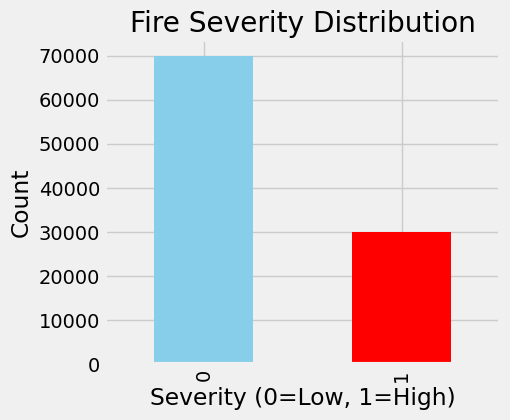

In [133]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['high_severity'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Fire Severity Distribution')
plt.xlabel('Severity (0=Low, 1=High)')
plt.ylabel('Count')

In [134]:
# Function for numerical analysis: (Univariate Analysis)
def numerical_analysis(df,numerical_feature,categorical_feature=None):
    
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,5))

    # KDE and boxplot for the numerical features:
    sns.kdeplot(x=df[numerical_feature],fill=True,color='purple',ax=ax[0],hue=categorical_feature)
    sns.boxplot(x=df[numerical_feature],color='red',linewidth=0.7,ax=ax[1],hue=categorical_feature)

    # Statistics for the numerical features:
    mean=df[numerical_feature].mean()
    median=df[numerical_feature].median()
    std=df[numerical_feature].std()
    skew=df[numerical_feature].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"skew:{round(skew,2)}"
    )
    
    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

In [135]:
# Function for numerical and categorical analysis: (Bivariate Analysis)
def numerical_categorical_analysis(df:pd.DataFrame,categorical_feature,numerical_feature)->None:
    
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5))

    # Stripplot and boxplot:
    sns.stripplot(x=df[categorical_feature],y=df[numerical_feature],color='purple',ax=ax[0],jitter=False)
    sns.boxplot(x=df[categorical_feature],y=df[numerical_feature],color='red',linewidth=0.7,ax=ax[1])

    # ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    # ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [136]:
#Multivariate Analysis:
def multivariate_analysis(df,num_col,cat_col1,cat_col2):
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(16,8))

    # Violin Plot and barplot for the numerical features:
    sns.violinplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='purple',ax=ax[0])
    sns.barplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='red',linewidth=0.7,ax=ax[1])

    ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [137]:
# Function to check normality:
def normality_check(df,feature,alpha=0.05):
    
    stat,p_value=stats.jarque_bera(df[feature])
    print(f"The p_value is:{p_value}")

    if p_value<=alpha:
        print("Reject Null Hypothesis. The data is not normally distributed")
    else:
        print("Fail to reject Null Hypothesis. The data is normally distributed")

# ANOVA:
def anova_test(df:pd.DataFrame, num_col, cat_col,alpha=0.05):
    data=df.loc[:,[num_col,cat_col]].dropna()

    cat_group=df.groupby(cat_col)
    groups=[group[num_col].values for _,group in cat_group]
    f_stat,p_value=stats.f_oneway(*groups)
    print(p_value)

    if p_value<=alpha:
        print(f"Reject null hypothesis. There is a significant relationship between {num_col} and {cat_col}")
    else:
        print(f"Fail to reject null hypothesis. There is no significant relationship between {num_col} and {cat_col}")

#Chi-Sqaure test:
def chiq_square(df:pd.DataFrame,cat_col1,cat_col2,alpha=0.05):
    data=df.loc[:,[cat_col1,cat_col2]]
    contingency_table=pd.crosstab(data[cat_col1],data[cat_col2])
    test_stats,p_value,_,_=stats.chi2_contingency(contingency_table)
    print(p_value)
    if p_value<alpha:
        print(f"Reject Null Hypothesis. There is significant associaion between {cat_col1} and {cat_col2}")
    else:
        print(f"Fail to reject Null Hypothesis. There is no significant associaion between {cat_col1} and {cat_col2}")

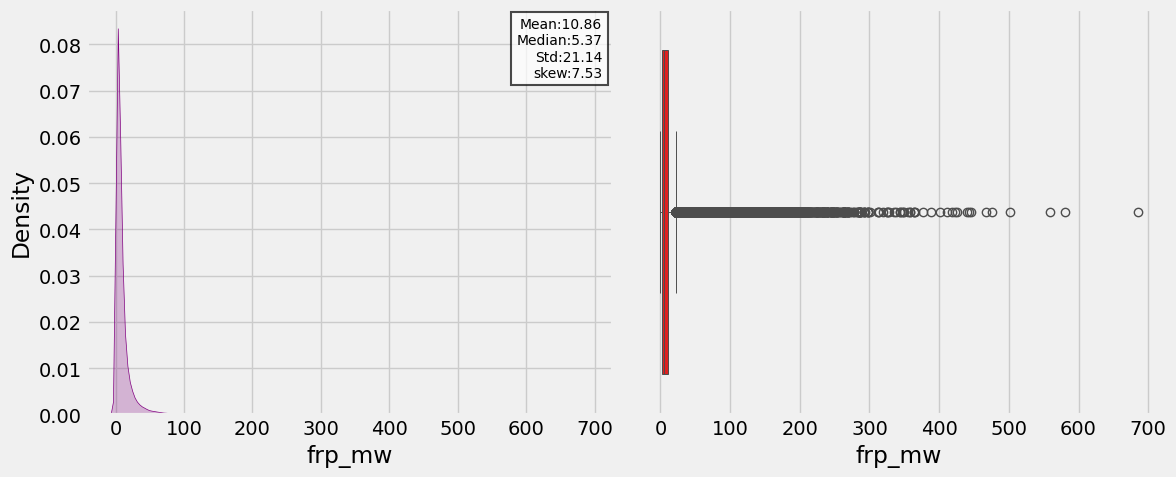

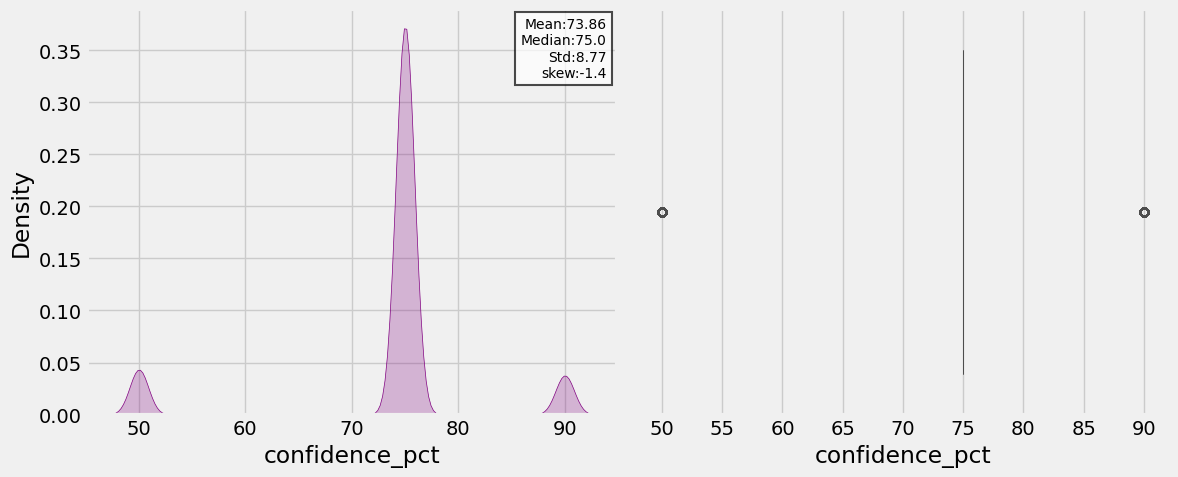

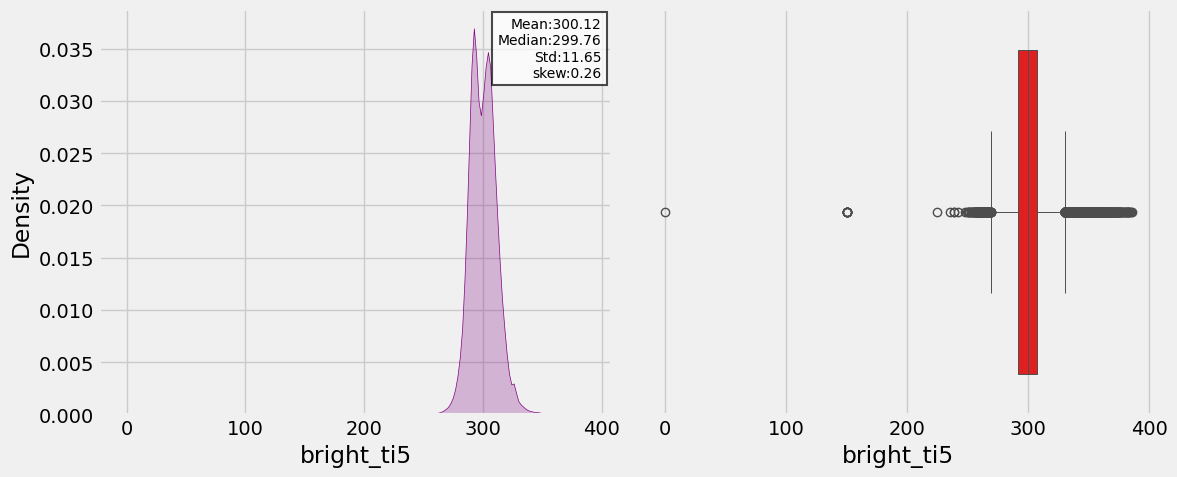

In [138]:
key_numerical = ['frp_mw', 'confidence_pct', 'bright_ti5']
for feature in key_numerical:
    numerical_analysis(df, feature)

BIVARIATE ANALYSIS (NUMERICAL VS CATEGORICAL)
Relationship: frp_mw vs season


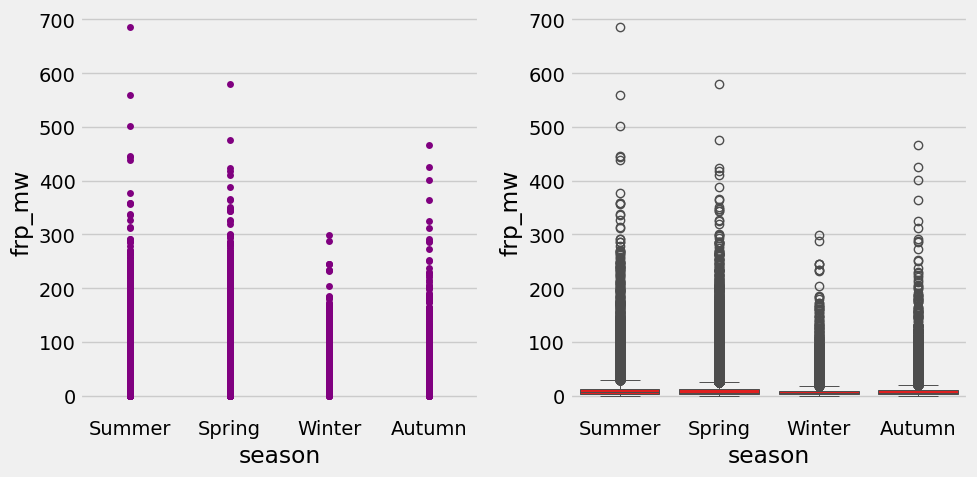

Relationship: confidence_pct vs is_daytime


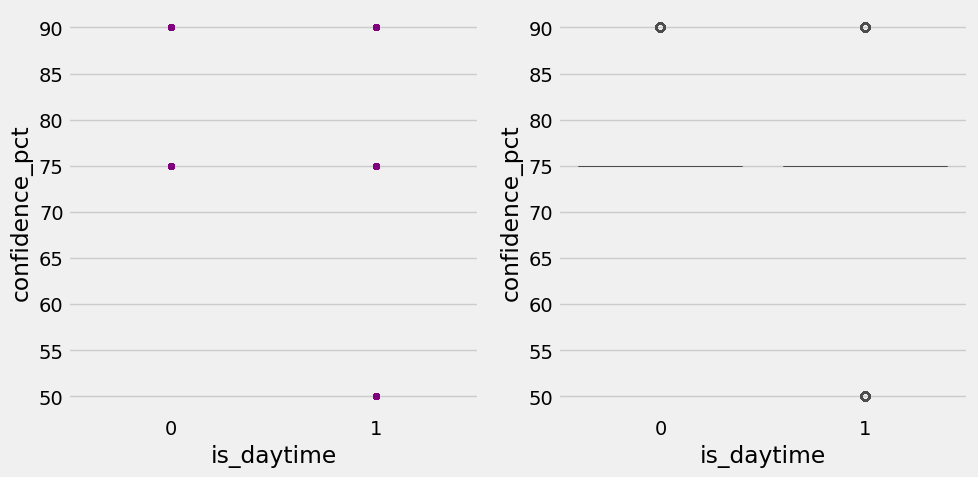

In [139]:
print("BIVARIATE ANALYSIS (NUMERICAL VS CATEGORICAL)")

relationships = [
    ('frp_mw', 'season'),
    ('confidence_pct', 'is_daytime')
]

for num_col, cat_col in relationships:
    print(f"Relationship: {num_col} vs {cat_col}")
    numerical_categorical_analysis(df, cat_col, num_col)

In [140]:
print("STATISTICAL TESTS (NORMALITY CHECK)")

# Check normality of key numerical features
for feature in key_numerical:
    normality_check(df, feature)


STATISTICAL TESTS (NORMALITY CHECK)
The p_value is:0.0
Reject Null Hypothesis. The data is not normally distributed
The p_value is:0.0
Reject Null Hypothesis. The data is not normally distributed
The p_value is:0.0
Reject Null Hypothesis. The data is not normally distributed


In [141]:
print("STATISTICAL TESTS (ANOVA)")
anova_tests = [
    ('frp_mw', 'season'),
]

for num_col, cat_col in anova_tests:
    anova_test(df, num_col, cat_col)

STATISTICAL TESTS (ANOVA)
1.1619117846073778e-157
Reject null hypothesis. There is a significant relationship between frp_mw and season


In [142]:
print("STATISTICAL TESTS (CHI-SQUARE)")


chi_tests = [
    ('region', 'is_daytime'),
]

for cat_col1, cat_col2 in chi_tests:
    chiq_square(df, cat_col1, cat_col2)

STATISTICAL TESTS (CHI-SQUARE)
0.0
Reject Null Hypothesis. There is significant associaion between region and is_daytime


In [145]:
num_col=[col for col in df.columns if df[col].dtype in ['int64','float64'] and col!='has_fire' and col!='version']

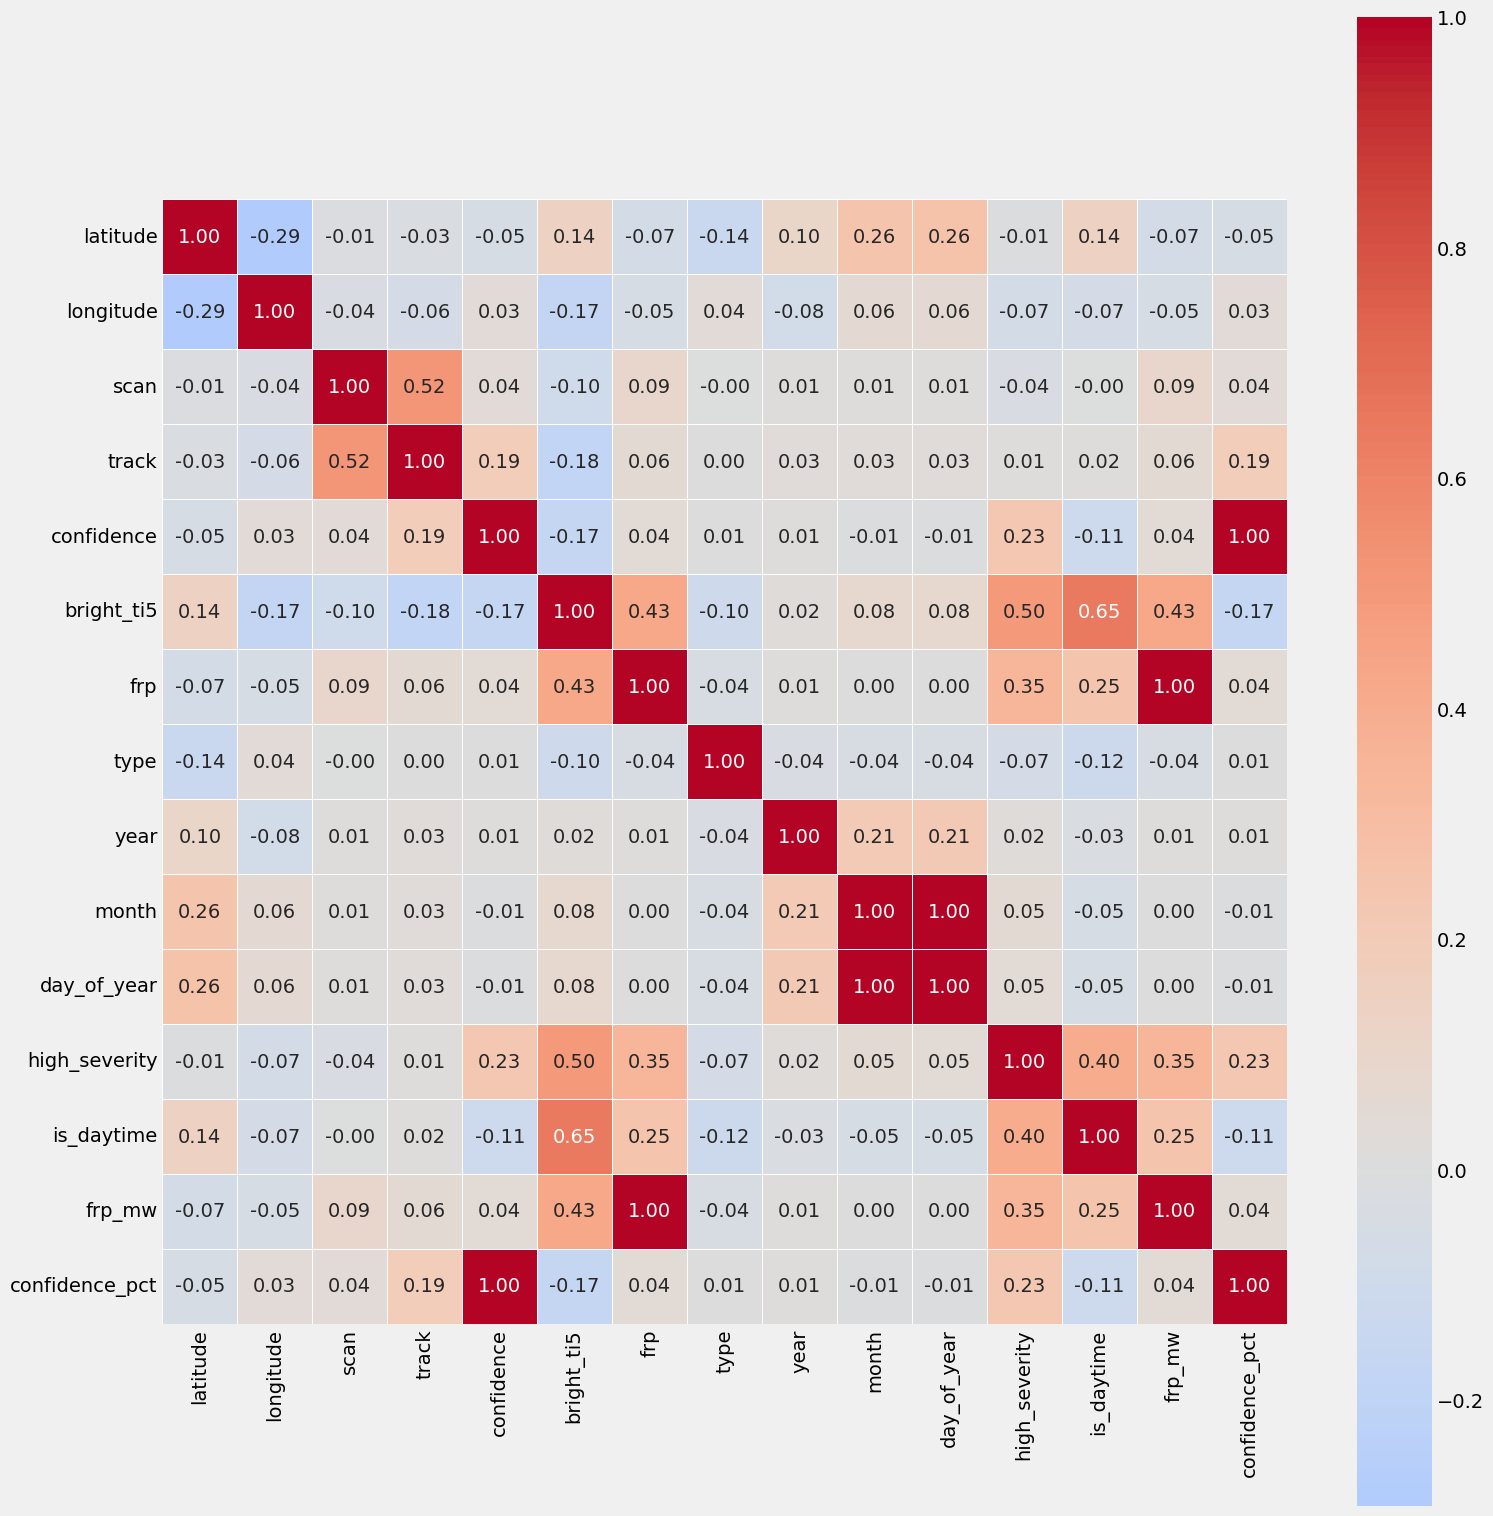

In [146]:
# Correlation heatmap for numerical features
plt.figure(figsize=(16, 16))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5,fmt='.2f')
plt.tight_layout()
plt.show()